# Titanic - Feature Engineer - Scaling Data- 15:05 23/10/2025

## Preparation

In [1]:
# import necessary library
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load feature engineered dataset (FamilySize)
path_dir = join("..", "..", "data")
input_dir = join(path_dir, "feature_engineered", "ageAndPclass")
output_dir = join(path_dir, "feature_engineered", "scaledData")
df = pd.read_csv(join(input_dir, "ageAndPclass_engineered_train.csv"))
df_test = pd.read_csv(join(input_dir, "ageAndPclass_engineered_test.csv"))

df.head()

,Survived,Sex,Fare,Embarked,FamilySize,AgeAndPclass
0,0,1,7.2500,2,2,66.0
1,1,0,71.2833,0,2,38.0
2,1,0,7.9250,2,1,78.0
3,1,0,53.1000,2,2,35.0
4,0,1,8.0500,2,1,105.0


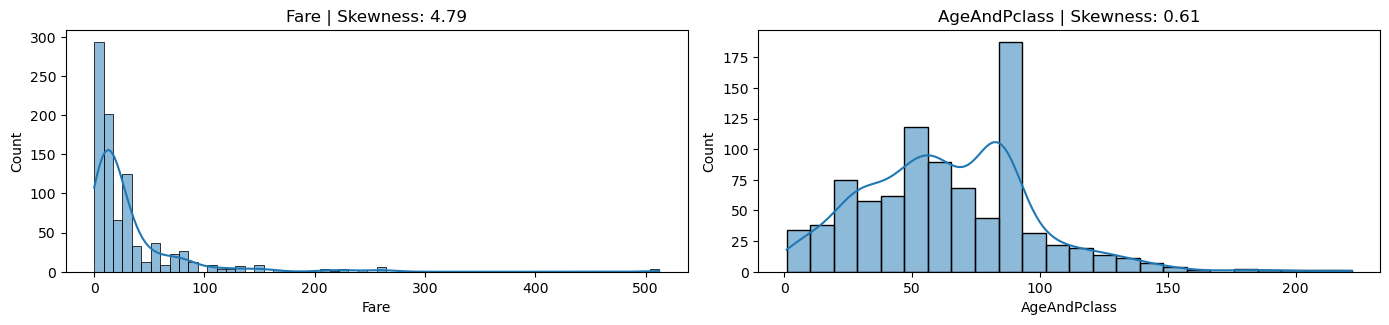

In [2]:
numerical_columns = df[['Fare', 'AgeAndPclass']]
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

`Fare` feature's distribution is highly skewed (right-skewed). We decided to do log transformation for `Fare` feature, creating new feature called `FareTransformed`

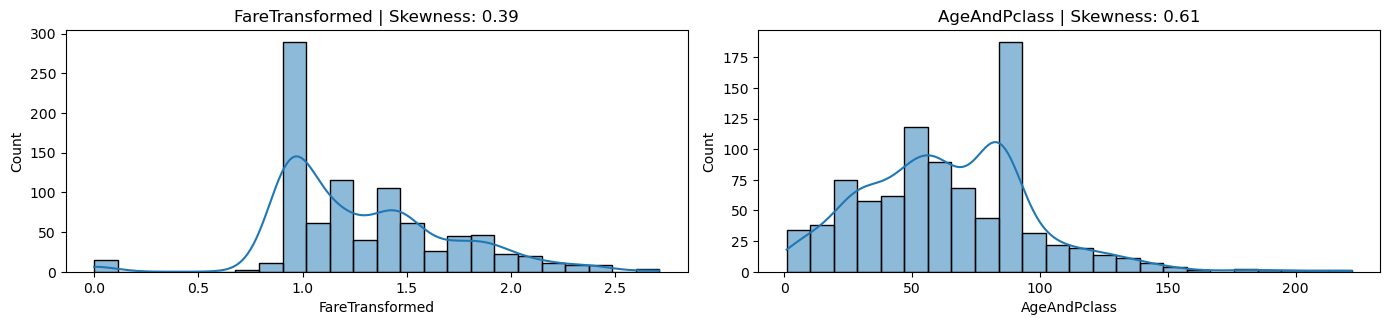

In [ ]:
df["FareTransformed"] = np.log10(df["Fare"] + 1)
df_test["FareTransformed"] = np.log10(df_test["Fare"] + 1)
df = df.drop(["Fare"], axis=1)
df_test = df_test.drop(["Fare"], axis=1)

numerical_columns = df[['FareTransformed', 'AgeAndPclass']]
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


In [4]:
# save dataframes into csv files
df.to_csv(join(output_dir, "scaledData_engineered_train.csv"))
df_test.to_csv(join(output_dir, "scaledData_engineered_test.csv"))

# The end